## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID' )
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
count_mice = combined_df['Mouse ID'].count()
count_mice

1893

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
duplicate_mouse_time = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_time


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID'])]
duplicate_mouse 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates('Mouse ID')
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
count_clean_mice = clean_combined_df['Mouse ID'].count()
count_clean_mice

# drug_count = clean_combined_df['Drug Regimen'].unique()
# drug_count

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_d = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': standard_d, 'SEM': sem})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = combined_df.groupby('Drug Regimen').agg(Tumor_vol_mean = ('Tumor Volume (mm3)', np.mean), Tumor_vol_median = ('Tumor Volume (mm3)', np.median), Tumor_vol_var = ('Tumor Volume (mm3)', np.var), Tumor_vol_stdev = ('Tumor Volume (mm3)', np.std), Tumor_vol_SEM = ('Tumor Volume (mm3)', st.sem)).round(3)

summary_agg_df

,Tumor_vol_mean,Tumor_vol_median,Tumor_vol_var,Tumor_vol_stdev,Tumor_vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

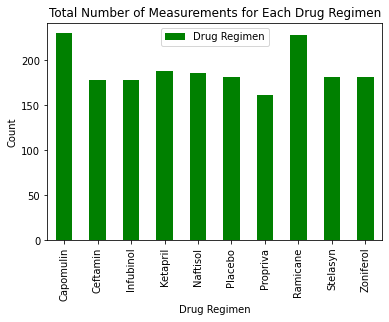

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# using pandas, create a dataframe to hold the drug regimen data
drug_regimen = combined_df.groupby('Drug Regimen')

# Counting each drug regimen's measurements
drug_regimen_count = pd.DataFrame(drug_regimen['Drug Regimen'].count())

# Setting bar chart for new pandas dataframe
drug_regimen_chart = drug_regimen_count.plot(kind='bar', title='Total Number of Measurements for Each Drug Regimen', color='green')

# formatting table with x and y axis labels
drug_regimen_chart.set_xlabel('Drug Regimen')
drug_regimen_chart.set_ylabel('Count')

# 
# plt.tight_layout()

plt.show()

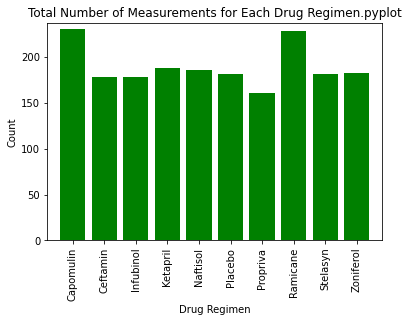

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#starting with pandas plot data set
x_axis = np.arange(len(drug_regimen_count))

# create bar chart on above data
plt.bar(x_axis, drug_regimen_count['Drug Regimen'], color='g', align='center')

#create ticks for bar chart's x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_count.index.values, rotation='vertical')

# set limits of x and y axis
plt.xlim(-0.8, len(x_axis)-0.2)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.03)

# Give the chart a title, x label and y label
plt.title('Total Number of Measurements for Each Drug Regimen.pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.show()

Text(0, 0.5, '')

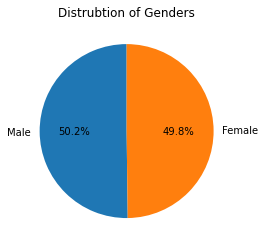

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# gender = combined_df.groupby("Sex")
# gender_comparison= pd.DataFrame(gender["Sex"].count())
# gender_comparison
# this confirms that I probably should use the cleaned up and dropped duplicate datafram
gender_pd = clean_combined_df['Sex'].value_counts()
pie_plot = gender_pd.plot.pie(autopct='%1.1f%%', title='Distrubtion of Genders', startangle=90)
pie_plot.set_ylabel('')


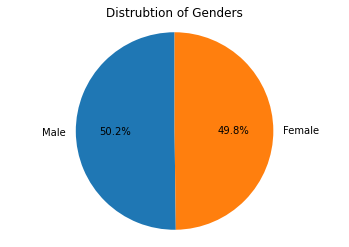

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_pypl = clean_combined_df['Sex'].value_counts()
plt.pie(gender_pypl, labels=gender_pypl.index.values, autopct='%1.1f%%', startangle=90)
plt.title('Distrubtion of Genders')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Greatest Timepoint'})
last_tp_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(combined_df, last_tp_df, on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [18]:

# Put treatments into a list for a for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
drug_tumor = []
counter = 0

for drug in drugs:
    drug_list = merge_df.loc[merge_df['Drug Regimen'] == drug]

    # add subset
    # aka create data frame for finding the end timepoint for the drugs listed
    end_tp_df = drug_list.loc[drug_list['Timepoint'] == drug_list['Greatest Timepoint']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # create a series for each drug on end volumes
    end_volume = end_tp_df['Tumor Volume (mm3)']
    drug_tumor.append(end_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = end_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq)
    
    # Find the upper and lower bounds to determine outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = (end_volume.loc[(end_tp_df['Tumor Volume (mm3)'] >= upper_bound) | 
                               (end_tp_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    if counter == 0:
        print(f'----------------------------------------------------')
    print(f'For {drug} the IQR is:')
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    print(f'The interquartile range of {drug} is: {iqr}')
    print(f'Values below {lower_bound} for {drug} could be outliers.')
    print(f'Values above {upper_bound} for {drug} could be outliers.')
    print(f'----------------------------------------------------')
    counter += 1

----------------------------------------------------
For Capomulin the IQR is:
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
----------------------------------------------------
For Ramicane the IQR is:
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
----------------------------------------------------
For Infubinol the IQR is:
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.7414455

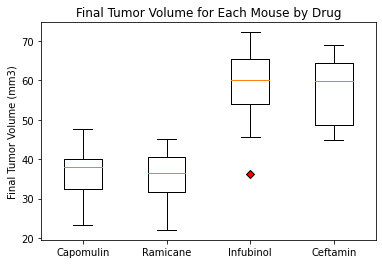

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using this as a reference for changing the format for boxplots
# https://matplotlib.org/3.1.0/gallery/pyplots/boxplot_demo_pyplot.html
red_diamond = dict(markerfacecolor='r', marker='D', markersize=6, markeredgecolor='black')
plt.boxplot(drug_tumor, flierprops=red_diamond)
plt.title('Final Tumor Volume for Each Mouse by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

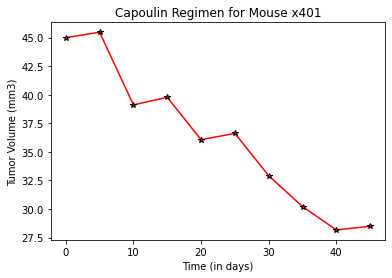

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# separating out the data for just Capomulin to find a single mouse
# capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
# capomulin.head(30)
# found s185, x401, m601 -- decided on x401

# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
mouse_x401 = combined_df.loc[combined_df['Mouse ID'] == 'x401']
plt.plot(mouse_x401['Timepoint'], mouse_x401['Tumor Volume (mm3)'], marker = '*', markeredgecolor='k', color = 'r')
plt.title('Capoulin Regimen for Mouse x401')
plt.xlabel('Time (in days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

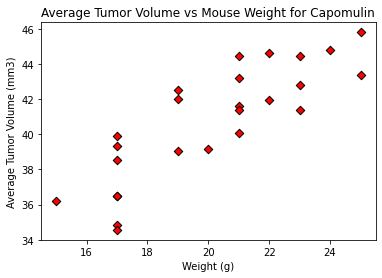

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#using previous capomulin data
capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# average tumor volume and weight by aggregate method
tumor_weight = capomulin.groupby(['Mouse ID']).agg(Weight =('Weight (g)', np.mean), Tumor_mean=('Tumor Volume (mm3)', np.mean)).round(4)
# tumor_weight.head(30)
x = tumor_weight['Weight']
y = tumor_weight['Tumor_mean']

# plot that scatter
plt.scatter(x, y, marker='D', facecolors='red', edgecolors='black')
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

For the Capomulin regimen, the correlation between weight and average tumor volume was found to be 0.8419


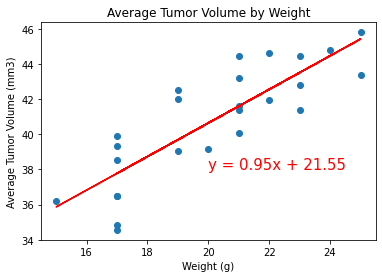

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

# using same code as scatter plot
capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
tumor_weight = capomulin.groupby(['Mouse ID']).agg(Weight =('Weight (g)', np.mean), Tumor_mean=('Tumor Volume (mm3)', np.mean)).round(4)
x = tumor_weight['Weight']
y = tumor_weight['Tumor_mean']

# calculate the st pearson
correlation = st.pearsonr(x, y)
print(f'For the Capomulin regimen, the correlation between weight and average tumor volume was found to be {round(correlation [0], 4)}')

# regression line set up
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# regression line on top of the scatter plot
plt.scatter(x, y)
plt.plot(x,regress_values, 'r-')

plt.annotate(line_eq,(20,38), fontsize=15, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()